# 내 노트북에서 Airbnb project 실습해 보기

- 테스트 결과가 나쁘지 않은 것 같은데.... MSE 43215.80395234093  

- colab 작업결과물이 MSE 42485.31175562778

- Apple M2 Max(12코어 CPU, 38코어 GPU, 16코어 Neural Engine)
96GB 통합 메모리.돈값하나.쯥.

In [2]:
############################################# 2. 프로젝트 성능 향상 버전
# 라이브러리
import pandas as pd

In [4]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test_1.csv')

In [5]:
#2.2. EDA(탐색적 데이터 분석)
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [6]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [7]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [8]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

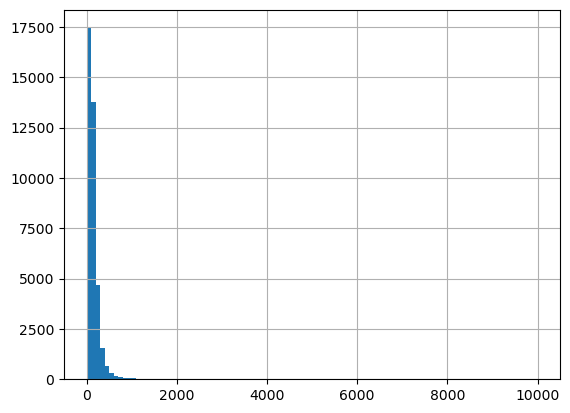

In [10]:
# target(hist)
train['price'].hist(bins=100)

In [11]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [12]:
# 피처(host_id)
train['host_id'].value_counts()

host_id
219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: count, Length: 30845, dtype: int64

<Axes: >

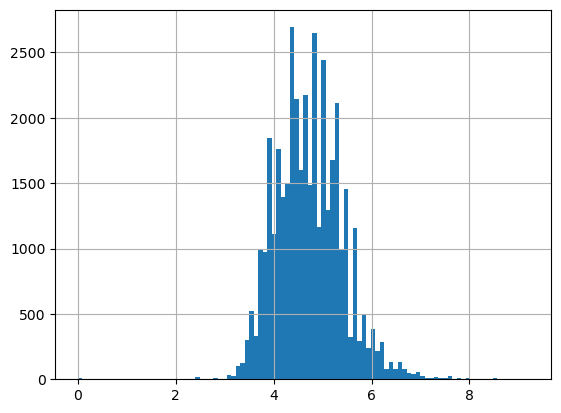

In [13]:
#3. 데이터 전처리
# 데이터를 살펴보고 판단하여 결측치 및 이상치를 처리
import numpy as np

train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [14]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [15]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [16]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [17]:
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [18]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [19]:
# 수치형 데이터와 범주형 데이터 분리
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()
# 수치형 변수

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
n_train = n_train.drop('id', axis=1)
n_test = n_test.drop('id', axis=1)

# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]
for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

del_cols =['name','host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)
display(c_train.head(1))

# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

,neighbourhood_group,neighbourhood,room_type
0,2,94,1


(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.000000,2,94,1
1,0.178671,0.631633,0.478445,0.000801,0.101749,0.028718,0.003067,0.717808,2,95,0
2,0.001595,0.558041,0.449354,0.047238,0.001590,0.003419,0.000000,0.000000,2,209,0
3,0.013033,0.464162,0.579361,0.002402,0.379968,0.049402,0.003067,0.002740,1,13,0
4,0.045468,0.458611,0.543571,0.021617,0.000000,0.000000,0.000000,0.000000,1,13,1


In [20]:
# 4. 검증 데이터 분리
# Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측 성능 평가
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

In [21]:
# 머신러닝(회귀).렌덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=2022, n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

23282.212179309623


In [22]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

17829.740305522922


In [23]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
pred = model.predict(X_val)
pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)
print(mse)

11928.698130033948


In [24]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1) # 기본값이 1
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

11961.380668636732


In [26]:
# XGBoost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=100)
pred = model.predict(X_val)
pred = np.expm1(pred)
mse = mean_squared_error(y_val, pred)

print(mse)

[0]	validation_0-rmse:4.08060
[100]	validation_0-rmse:0.43163
[200]	validation_0-rmse:0.42686
[300]	validation_0-rmse:0.42561
[400]	validation_0-rmse:0.42425
[500]	validation_0-rmse:0.42382
[600]	validation_0-rmse:0.42347
[700]	validation_0-rmse:0.42357
[800]	validation_0-rmse:0.42365
[900]	validation_0-rmse:0.42360
[999]	validation_0-rmse:0.42366
23485.407130367574


In [27]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# Xgboost
pred = model.predict(test)
pred = np.expm1(pred)
mse = mean_squared_error(y_test, pred)
print(mse)

43215.80395234093


In [28]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print(f"나의 점수는 (MSE {mse})입니다.")

나의 점수는 (MSE 43215.80395234093)입니다.
